<div style="background-color: lightblue;">
    
# Digital House - Data Science a Distancia

## Trabajo Final

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
    
<p style="text-align:right;">Agosto 2022</p>

---
</div>    

---
# Objetivo del Trabajo Final

<h4 style="text-align:center;">Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un valor</h4>

---
### Contexto

???
---
### Requisitos del Trabajo Final

- Utilizar modelos de regresión o clasificación (es opcional)
- Evaluar modelos mediante ensambles, bagging o boosting
- Realizar selección de hiperparámetros
- Implementar pipeline con al menos unos pasos del preprocesamiento
- Analizar importancia de características
- Serializar el modelo con mejor desempeño

---
### Entregables del Trabajo Final
#### Técnico (Jupyter Notebook)

1. Introducción y planteo del problema
2. Técnicas a utilizar y detalle del conjunto de datos
3. Desarrollo del análisis, visualizacioones, resultados de modelos
4. Dtelle de hallazgos, conclusiones y recomendaciones

#### Presentación (audiencia NO TÉCNICA)

1. Resumen del problema
2. Métodos utilizados
3. Principales resultados

---
### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.13.0 build  3.21.6, Python 3.9.7*


---

#### Necessary libraries


In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')


# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML


# to do some statistical tests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st


In [2]:
# machine learning libraries



---

#### Useful functions


In [3]:
def get_types_nulls_and_describe(data) :
    u''' Gets DataFrame data types, count of null values and statistical descriptions for each feature
    
    args
        data : pandas DataFrame

    returns
        pandas DataFrame
    '''

    result = data.describe(include='all').transpose()
    result.insert(0, 'nulls', data.isnull().sum().values)
    result.insert(0, 'types', data.dtypes)

    return result

def show_description(data, include='all', exclude=None) :
    u''' Show DataFrame describe details
    
    args
        data : pandas DataFrame

    returns
        None
    '''

    display(HTML('<hr><h4>Detalles de cada característica</h4>'))
    display(data.describe(include=include, exclude=exclude).transpose())
    
    return

def show_data(data, title='Algunos datos') :
    u''' Show DataFrame
    
    args
        data : pandas DataFrame

    returns
        None
    '''
    display(HTML('<hr><h4>' + title + '</h4>'))
    display(data)

    return    

def show_dataframe_basic_info(data) :
    u''' Show DataFrame basic information
    
    args
        data : pandas DataFrame

    returns
        None
    '''

    # show shape
    display(HTML('<hr><h4>Cantidad de datos</h4>'))
    display(HTML('<h5>' + str(data.shape[0]) +' observaciones con ' + str(data.shape[1]) + ' características</h5>'))

    # show data types, null values counts and data description
    display(HTML('<hr><h4>Tipos de datos, valores nulos y detalle de cada característica</h4>'))
    display(get_types_nulls_and_describe(data))

    return

In [4]:
def set_figure(row, col, suptitle=None) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, 
                     verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

In [5]:
def show_corr(data, target) :
    u'''
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

def show_some_boxplots(data, columns, target=None, cols=4) :
    u''' Display some boxplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show
        target : binary values to split the histogram; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    for i, column in enumerate(data[columns]) :
        ax = plt.subplot(rows, cols, i+1)
        sns.boxplot(data=data, x=target, y=column, palette="RdYlBu")
        plt.tight_layout();
        plt.xlabel(None);
        plt.ylabel(column);
    return

def show_some_hists(data, columns, target=None, cols=4, stat='count') :
    u''' Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    for i, column in enumerate(data[columns]) :
        try :
            plt.subplot(rows, cols, i+1)
            sns.histplot(data=data, x=column, kde=True, hue=target, stat=stat)
            plt.tight_layout();
            plt.xlabel(column);
            plt.ylabel(None);
        except :
            pass
    return

def show_some_plots(data, columns, target=None, cols=4) :
    u''' Display some countplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to count
        target : binary values to split the count; if None draw a simple countplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) // cols) + 1
    if target != None :
        rows *= 2
    for i, column in enumerate(data[columns]) :
        if target == None :
            plt.subplot(rows, cols, i+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
        else :
            # standar count plot
            plt.subplot(rows, cols, i*2+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
            
            # count by target values
            plt.subplot(rows, cols, i*2+2)
            sns.countplot(data=data, x=column, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
    return

---



In [6]:
# def show_train_test_shapes(X_train, X_test, y_train, y_test) :
#     u'''
#     '''
    
#     print()
#     print("X_train:", X_train.shape, "\ty_train:", y_train.shape, end=' \tclases ')
#     for i, n in enumerate(y_train.value_counts(normalize=True) ) : 
#         print(i, ' : ', round(n*100, 2), '% \t', sep='', end='')

#     print('\n')
#     print("X_test :", X_test.shape, "\ty_test :", y_test.shape, end=' \tclases ')    
#     for i, n in enumerate(y_test.value_counts(normalize=True) ) : 
#         print(i, ' - ', round(n*100, 2), '% \t', sep='', end='')

#     print('\n')
    
#     return

In [7]:
def show_X_y(X, y, categorical=None) :
    u'''
    '''
    if categorical == None or categorical == False :
        print()
        print("X :", X.shape, "\ty :", y.shape)
        print('\n')
    
    return

In [8]:

# def evaluate_some_models(data, features, target) :
    
#     # set
#     X = data[features]
#     y = data[target]

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#     show_train_test_shapes(X_train, X_test, y_train, y_test)
    
#     # set models to evaluate
#     models = []

#     models.append( Model(name='Gaussian Naive Bayes', model=GaussianNB(), ) )
#     # models.append( Model(name='Categorical Naive Bayes', model=CategoricalNB(), ) )
#     # models.append( Model(name='Árbol de Decisión', model=DecisionTreeClassifier(random_state=0) ) )
#     models.append( Model(name='Gradiente Booster', model=GradientBoostingClassifier() ) )

#     # train each model
#     for m in models :
#         m.train(X_train, y_train)

#     # predict and show basic information from each model
#     for m in models :
#         m.predict(X_test, y_test)
#         display(HTML('<b>' + m.name + '</b>'))
#         print(m.classification_report)

#     return


---
<a id="Dataset"></a>

### Conjunto de datos - Dataset

Los datos originales son de [Manhattan Chocolate Society](http://flavorsofcacao.com/mcs_index.html)

El conjunto de datos se obtuvo de la [competencia en Datacamp](https://app.datacamp.com/learn/competitions/chocolate-bar-ratings) finalizada el 30 de junio de 2022.

---

*Las características en el conjunto de datos original son*:

    - id                   : Identificador de la revisión de la barra de chocolate
    - manufacturer         : Nombre del manufactorador de la barra de chocolate
    - company_location     : Ubicación del manufactorador de la barra de chocolate
    - year_reviewed        : Año de la revisión de 2006 al 2021
    - bean_origin          : Origen del grano de cacaco
    - bar_name             : Nombre de la barra de chocolate
    - cocoa_percent        : Porcentaje de cacaco en la barra de chocolate
    - num_ingredients      : Número de ingredientes en la barra de chocolate
    - ingredients          : Ingredientes (ver codificación)
    - review               : Revisión, análisis o evaluación de la barra de chocolate
    - rating               : Clasificación (ver escala)
    

*Codificación de ingredientes en la barra de chocolate*

    - B  : Beans (grano)
    - S  : Sugar (azucar)
    - S* : Sweetener (edulcolrante distinto de azucar)
    - C  : Cocoa Butter (mantequilla de cacaco)
    - V  : Vanilla (vainilla)
    - L  : Lecithin (lecitina)    
    - Sa : Salt (sal)

*Escala de clasificación de una barra de chocolate*

    - 1.0  a 1.9  : Unpleasant (Desagradable)
    - 2.0  a 2.9  : Disappointing (Decepcionante)
    - 3.0  a 3.49 : Recommended (Recomendable)
    - 3.5  a 3.9  : Highly Recommended (Altamente Recomendable)
    - 4.0  a 5.0  : Oustanding (Sobresaliente)

---


---
<a id="Exploratory_data_analysis_01"></a>
### Exploración y análisis de datos básico del Conjunto de datos - Dataset
---


In [9]:
# read dataset
data = pd.read_csv('./data/chocolate_bars.csv')

# remove duplicates
data.drop_duplicates(inplace=True)
# set sequential and successive index values
data.reset_index(drop=True, inplace=True)

# # show data
# show_data(data)

# # show shape
# display(HTML('<hr><h4>Cantidad de datos</h4>'))
# display(HTML('<h5>' + str(data.shape[0]) +' observaciones con ' + str(data.shape[1]) + ' características</h5>'))

# # show data types, null values counts and data description
# display(HTML('<hr><h4>Tipos de datos, valores nulos y detalle de cada característica</h4>'))
# display(get_types_nulls_and_describe(data))


In [10]:
target = 'rating'

---
#### Observaciones sobre las características con valores nulos

- Las características 'ingredients' y 'num_ingredients' corresponden a las mismas observaciones, de modo que 'ingredients' se completa con el **valor más frecuente** y 'num_ingredients' que corresponde al **número de valores diferentes de la característica 'ingredients'** se completa con dicho valor

---

In [11]:
from sklearn.impute import SimpleImputer

def ingredients_imputer(data) :
    u''' Imputer for 'ingredients' and 'num_ingredients' features with null values
    
    WARNING: data inside DataFrame will be updated take care to use in pipeline
    ===========================================================================

    Original idea from Shahriar Rahman https://app.datacamp.com/profile/mdshahriar983
    
    args
        data : pandas DataFrame

    returns
        None    
    '''
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer.fit(data[['ingredients']])
    data[['ingredients']] = imputer.transform(data[['ingredients']])
    data['num_ingredients'] = data['ingredients'].apply( lambda x : len( [t for t in x.replace(' ','').split(sep=',')] ) )
    
    return 

ingredients_imputer(data)

In [12]:
# # show data types and null values counts
# display(HTML('<hr><h4>Tipos de datos, SIN VALORES NULOS y detalle de cada característica</h4>'))
# display(get_types_nulls_and_describe(data))


In [13]:
def show_rating_values(data) :
    
    set_figure(14, 6, 'Valores de la clasificación original en ' + str(len(data)) + ' observaciones' +
               '\nMedia: ' + str(round(data['rating'].mean(),2)) + 
               ' - Mediana: ' + str(round(data['rating'].median(),2)) +
               ' - Moda: ' + str(round(data['rating'].mode()[0],2)) )

    # sns.histplot(data=data, x='rating', kde=True, stat='percent')
    sns.countplot(data=data, x='rating')

    plt.tight_layout();
    plt.xlabel('Clasificación');
    plt.ylabel('Número de observaciones');

    return

# show_rating_values(data)
# show_rating_values(data[data['rating']>=2.5])


In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer


In [15]:
def encode_some_features(data) :

    # oe_company_location = OrdinalEncoder()
    # oe_company_location.fit(data[['company_location']])
    # data['company_location_cat'] = oe_company_location.transform(data[['company_location']])

    # oe_bean_origin = OrdinalEncoder()
    # oe_bean_origin.fit(data[['bean_origin']])
    # data['bean_origin_cat'] = oe_bean_origin.transform(data[['bean_origin']])
    
    oe_ingredients = OrdinalEncoder()
    oe_ingredients.fit(data[['ingredients']])
    data['ingredients_cat'] = oe_ingredients.transform(data[['ingredients']])

    return

encode_some_features(data)


In [16]:
ingredients_dict = {'b'  : 'beans',
                    'c'  : 'cocoa_butter',
                    'l'  : 'lecithin',
                    's'  : 'sugar',
                    's*' : 'sweetener',
                    'sa' : 'salt',
                    'v'  : 'vanilla'}

ingredients_features = list(ingredients_dict.values())


def ingredients_EDA1(data) :
    u''' 
    
    
    '''
    
    col='ingredients'
    work = pd.DataFrame(data[col])
    work['text'] = work[col].apply( lambda x : set( [t for t in x.lower().replace(' ','').split(sep=',')] ) )

    classes = np.array(list(ingredients_dict.keys()))
    mlb = MultiLabelBinarizer(classes=classes)
    work = pd.DataFrame(mlb.fit_transform(work['text']))
    work.columns = mlb.classes_
    
    work.rename(columns=ingredients_dict, inplace=True)
    work.index = data.index
    
    cols = list(data.columns) + list(work.columns)
    data = pd.concat([data, work], axis='columns', ignore_index=True)
    data.columns = cols
    
    return data

data = ingredients_EDA1(data)



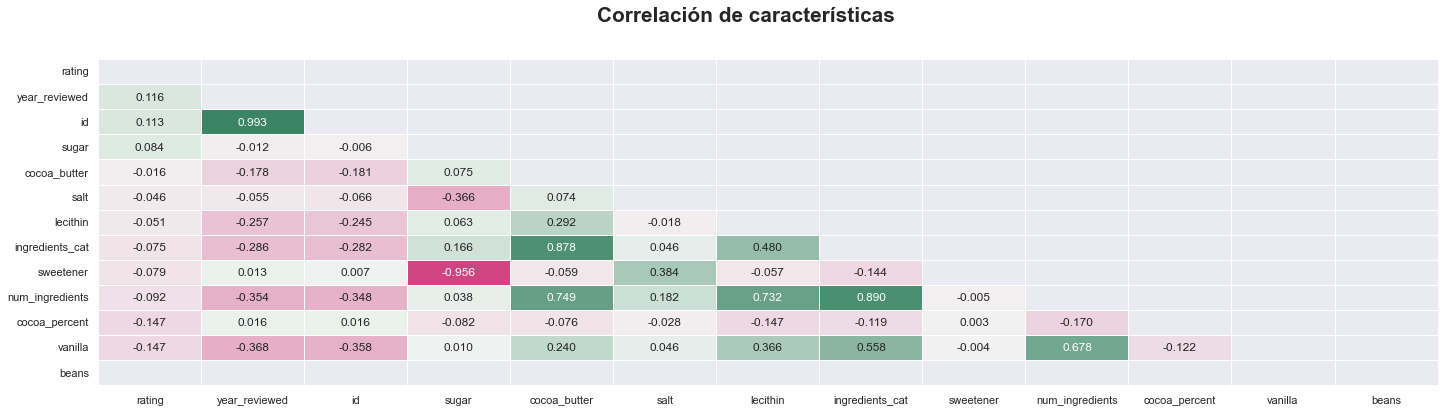

In [17]:

set_figure(24, 6, 'Correlación de características')
show_corr(data=data, target=target)


In [18]:
# # show data types and null values counts
# display(HTML('<hr><h4>Tipos de datos, SIN VALORES NULOS y detalle de cada característica</h4>'))
# display(get_types_nulls_and_describe(data))


---
### Evaluate base line models
---

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import BaggingRegressor


In [20]:
def show_MSE(value, decimals=6) :
    
    display(HTML('MSE.: ' + str(round(value, decimals)) +
                 ' - ' +
                 'RMSE: ' + str(round(np.sqrt(value), decimals))
                ))

    return


In [21]:
model_features = ['year_reviewed', 'num_ingredients', 'cocoa_percent', 'ingredients_cat'] + ingredients_features

X = data[model_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

show_X_y(X_train, y_train)


model_scaler = StandardScaler()
model_scaler.fit(X_train)
X_train_scl = model_scaler.transform(X_train)
X_test_scl = model_scaler.transform(X_test)


X : (1695, 11) 	y : (1695,)




In [22]:

base_regressor = LinearRegression()

fit_base = base_regressor.fit(X_train_scl, y_train)
predict_base = fit_base.predict(X_test_scl)
performance_base = mean_squared_error(y_test, predict_base)
show_MSE(performance_base)



In [23]:
bag_linreg = BaggingRegressor(base_estimator = base_regressor, 
                            n_estimators = 1000,
                            max_samples = 0.3,
                            bootstrap = True, 
                            max_features = 2,
                            bootstrap_features = False,
                            n_jobs = -1,
                            random_state = 127)


In [24]:
bag_linreg.fit(X_train_scl, y_train)
prediction = bag_linreg.predict(X_test_scl)
performance = mean_squared_error(y_test, prediction)
show_MSE(performance)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
random_forest = RandomForestRegressor(n_estimators=1000, 
                                      criterion='mse', 
                                      max_depth = 4, 
                                      bootstrap=True, 
                                      n_jobs = -1, 
                                      random_state = 127,
                                      max_samples= 0.3)

In [27]:
random_forest.fit(X_train_scl, y_train)

RandomForestRegressor(max_depth=4, max_samples=0.3, n_estimators=1000,
                      n_jobs=-1, random_state=127)

In [28]:
prediction = random_forest.predict(X_test_scl)
performance = mean_squared_error(y_test, prediction)
show_MSE(performance)